### **IMPORTING MODELS**

In [1]:
pip install heartpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import heartpy as hp

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
data_raw=pd.read_csv("ECG_training.csv")

In [5]:
data_raw.head(5)

,ECG,Classification
0,"-127,-162,-197,-229,-245,-254,-261,-265,-268,-...",N
1,"128,157,189,226,250,257,262,265,268,269,268,26...",N
2,"519,619,723,827,914,956,955,934,920,900,889,88...",A
3,"-266,-316,-367,-407,-423,-423,-401,-367,-329,-...",N
4,"21,22,24,26,28,31,32,34,34,35,35,34,34,34,35,3...",N


In [6]:
data_all_params = []

for i in data_raw.loc[:, 'ECG']:
  i = np.array([int(j) for j in i.split(',')])
  data_all_params.append(i)


In [7]:
data_all_params = np.array(data_all_params)
data_processed = pd.DataFrame(data_all_params)
data_processed['Classification'] = data_raw['Classification']

In [8]:
data_processed

,0,1,2,3,4,5,6,7,8,9,...,8991,8992,8993,8994,8995,8996,8997,8998,8999,Classification
0,-127,-162,-197,-229,-245,-254,-261,-265,-268,-268,...,19,8,0,-7,-12,-15,-18,-22,-21,N
1,128,157,189,226,250,257,262,265,268,269,...,-5,-3,-2,-1,-1,0,0,1,2,N
2,519,619,723,827,914,956,955,934,920,900,...,1144,1055,866,632,403,224,116,17,18,A
3,-266,-316,-367,-407,-423,-423,-401,-367,-329,-305,...,74,73,69,68,66,62,51,34,21,N
4,21,22,24,26,28,31,32,34,34,35,...,-456,-263,-46,133,227,257,236,174,84,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,347,378,410,540,695,736,751,778,849,803,...,241,267,252,115,10,1,37,26,-80,N
3496,-59,-71,-87,-104,-111,-114,-117,-119,-120,-121,...,120,92,63,32,16,7,2,0,-4,N
3497,-60,-83,-106,-128,-145,-155,-163,-168,-173,-177,...,52,47,42,34,18,5,-5,-8,-9,N
3498,582,702,807,893,962,997,984,945,927,915,...,-25,-23,-13,-38,-65,-65,-50,-42,-46,N


### **EDA Analysis and Feature Extraction**

In [9]:
data_processed=pd.get_dummies(data_processed,drop_first=True)

In [10]:
data_processed

,0,1,2,3,4,5,6,7,8,9,...,8991,8992,8993,8994,8995,8996,8997,8998,8999,Classification_N
0,-127,-162,-197,-229,-245,-254,-261,-265,-268,-268,...,19,8,0,-7,-12,-15,-18,-22,-21,1
1,128,157,189,226,250,257,262,265,268,269,...,-5,-3,-2,-1,-1,0,0,1,2,1
2,519,619,723,827,914,956,955,934,920,900,...,1144,1055,866,632,403,224,116,17,18,0
3,-266,-316,-367,-407,-423,-423,-401,-367,-329,-305,...,74,73,69,68,66,62,51,34,21,1
4,21,22,24,26,28,31,32,34,34,35,...,-456,-263,-46,133,227,257,236,174,84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,347,378,410,540,695,736,751,778,849,803,...,241,267,252,115,10,1,37,26,-80,1
3496,-59,-71,-87,-104,-111,-114,-117,-119,-120,-121,...,120,92,63,32,16,7,2,0,-4,1
3497,-60,-83,-106,-128,-145,-155,-163,-168,-173,-177,...,52,47,42,34,18,5,-5,-8,-9,1
3498,582,702,807,893,962,997,984,945,927,915,...,-25,-23,-13,-38,-65,-65,-50,-42,-46,1


In [11]:
data_processed.isnull().sum()

0                   0
1                   0
2                   0
3                   0
4                   0
                   ..
8996                0
8997                0
8998                0
8999                0
Classification_N    0
Length: 9001, dtype: int64

In [12]:
readable_data = []
for i in range(0, 3500):
    wp, measures = hp.process(data_processed.iloc[i, :-1], sample_rate = 300.0, clean_rr = True,clean_rr_method='z-score',bpmmax=2000,bpmmin=-1000)
    values = [i for i in list(measures.values())]
    readable_data.append(np.array(values[0:-1]))
readable_data = np.array(readable_data)

C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:5317: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\daram\AppData\Local\Temp\ipykernel_964\52291465.py:5: UserWarning: Warning: converting a masked element to nan.
  readable_data.append(np.array(values[0:-1]))
C:\ProgramData\Anaconda3\lib\si

In [13]:
readable_data.shape
    

(3500, 12)

In [14]:
data=pd.DataFrame(readable_data,columns=[i for i in range(1,13)])

In [15]:
data

,1,2,3,4,5,6,7,8,9,10,11,12
0,78.965597,759.824561,32.308341,13.039216,23.466009,0.411765,0.029412,26.666667,16.585877,43.207663,2251.381471,0.383864
1,358.096197,167.552743,144.744509,140.973203,223.148951,0.893939,0.803030,103.333333,157.705144,138.037173,68389.871397,1.142483
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,89641.686245,0.845574
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,104148.063640,1.952888
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,4568.346982,0.302504
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,183.073011,327.738095,151.683813,98.921107,254.435587,0.976744,0.953488,131.666667,179.874513,121.474451,68644.295126,1.480760
3496,217.728832,275.572139,20.372876,0.000000,166.666667,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
3497,237.105751,253.051643,196.085117,150.753119,328.476105,0.931034,0.931034,176.666667,231.333854,150.012969,109022.935841,1.542092
3498,82.389289,728.250000,42.752437,7.964698,14.088950,0.108108,0.000000,18.333333,9.789606,57.033645,1754.067054,0.171646


In [16]:
data.isna().sum()

1      10
2      10
3      10
4      68
5      68
6      68
7      68
8      10
9      68
10     68
11     68
12    231
dtype: int64

In [17]:
data=data.dropna()

In [18]:
data.shape

(3269, 12)

In [19]:
data['Classification'] = data_raw['Classification']

C:\Users\daram\AppData\Local\Temp\ipykernel_964\862756047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Classification'] = data_raw['Classification']


In [20]:
data

,1,2,3,4,5,6,7,8,9,10,11,12,Classification
0,78.965597,759.824561,32.308341,13.039216,23.466009,0.411765,0.029412,26.666667,16.585877,43.207663,2251.381471,0.383864,N
1,358.096197,167.552743,144.744509,140.973203,223.148951,0.893939,0.803030,103.333333,157.705144,138.037173,68389.871397,1.142483,N
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,89641.686245,0.845574,A
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,104148.063640,1.952888,N
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,4568.346982,0.302504,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,277.877698,215.922330,142.097807,118.393358,210.230370,0.946809,0.861702,116.666667,148.653017,125.457157,58589.398821,1.184891,N
3495,183.073011,327.738095,151.683813,98.921107,254.435587,0.976744,0.953488,131.666667,179.874513,121.474451,68644.295126,1.480760,N
3497,237.105751,253.051643,196.085117,150.753119,328.476105,0.931034,0.931034,176.666667,231.333854,150.012969,109022.935841,1.542092,N
3498,82.389289,728.250000,42.752437,7.964698,14.088950,0.108108,0.000000,18.333333,9.789606,57.033645,1754.067054,0.171646,N


In [21]:
data=pd.get_dummies(data,drop_first=True)

In [22]:
data = data.replace((np.inf, -np.inf, np.nan), np.nan).reset_index(drop=True)

In [23]:
data

,1,2,3,4,5,6,7,8,9,10,11,12,Classification_N
0,78.965597,759.824561,32.308341,13.039216,23.466009,0.411765,0.029412,26.666667,16.585877,43.207663,2251.381471,0.383864,1
1,358.096197,167.552743,144.744509,140.973203,223.148951,0.893939,0.803030,103.333333,157.705144,138.037173,68389.871397,1.142483,1
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,89641.686245,0.845574,0
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,104148.063640,1.952888,1
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,4568.346982,0.302504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,277.877698,215.922330,142.097807,118.393358,210.230370,0.946809,0.861702,116.666667,148.653017,125.457157,58589.398821,1.184891,1
3265,183.073011,327.738095,151.683813,98.921107,254.435587,0.976744,0.953488,131.666667,179.874513,121.474451,68644.295126,1.480760,1
3266,237.105751,253.051643,196.085117,150.753119,328.476105,0.931034,0.931034,176.666667,231.333854,150.012969,109022.935841,1.542092,1
3267,82.389289,728.250000,42.752437,7.964698,14.088950,0.108108,0.000000,18.333333,9.789606,57.033645,1754.067054,0.171646,1


In [24]:
data.isna().sum()

1                   0
2                   0
3                   0
4                   0
5                   0
6                   0
7                   0
8                   0
9                   0
10                  0
11                  0
12                  2
Classification_N    0
dtype: int64

In [25]:
data=data.dropna()

In [26]:
data.isna().sum()

1                   0
2                   0
3                   0
4                   0
5                   0
6                   0
7                   0
8                   0
9                   0
10                  0
11                  0
12                  0
Classification_N    0
dtype: int64

In [27]:
data

,1,2,3,4,5,6,7,8,9,10,11,12,Classification_N
0,78.965597,759.824561,32.308341,13.039216,23.466009,0.411765,0.029412,26.666667,16.585877,43.207663,2251.381471,0.383864,1
1,358.096197,167.552743,144.744509,140.973203,223.148951,0.893939,0.803030,103.333333,157.705144,138.037173,68389.871397,1.142483,1
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,89641.686245,0.845574,0
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,104148.063640,1.952888,1
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,4568.346982,0.302504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,277.877698,215.922330,142.097807,118.393358,210.230370,0.946809,0.861702,116.666667,148.653017,125.457157,58589.398821,1.184891,1
3265,183.073011,327.738095,151.683813,98.921107,254.435587,0.976744,0.953488,131.666667,179.874513,121.474451,68644.295126,1.480760,1
3266,237.105751,253.051643,196.085117,150.753119,328.476105,0.931034,0.931034,176.666667,231.333854,150.012969,109022.935841,1.542092,1
3267,82.389289,728.250000,42.752437,7.964698,14.088950,0.108108,0.000000,18.333333,9.789606,57.033645,1754.067054,0.171646,1


In [28]:
X=data.drop(['Classification_N'],axis=1)

In [29]:
X

,1,2,3,4,5,6,7,8,9,10,11,12
0,78.965597,759.824561,32.308341,13.039216,23.466009,0.411765,0.029412,26.666667,16.585877,43.207663,2251.381471,0.383864
1,358.096197,167.552743,144.744509,140.973203,223.148951,0.893939,0.803030,103.333333,157.705144,138.037173,68389.871397,1.142483
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,89641.686245,0.845574
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,104148.063640,1.952888
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,4568.346982,0.302504
...,...,...,...,...,...,...,...,...,...,...,...,...
3264,277.877698,215.922330,142.097807,118.393358,210.230370,0.946809,0.861702,116.666667,148.653017,125.457157,58589.398821,1.184891
3265,183.073011,327.738095,151.683813,98.921107,254.435587,0.976744,0.953488,131.666667,179.874513,121.474451,68644.295126,1.480760
3266,237.105751,253.051643,196.085117,150.753119,328.476105,0.931034,0.931034,176.666667,231.333854,150.012969,109022.935841,1.542092
3267,82.389289,728.250000,42.752437,7.964698,14.088950,0.108108,0.000000,18.333333,9.789606,57.033645,1754.067054,0.171646


In [30]:
y=data['Classification_N']

In [31]:
y

0       1
1       1
2       0
3       1
4       1
       ..
3264    1
3265    1
3266    1
3267    1
3268    1
Name: Classification_N, Length: 3267, dtype: uint8

In [32]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [33]:
print(X.std())

1.0


In [34]:
X.shape

(3267, 12)

### **SELECTING MODEL**

In [35]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [36]:
def models_cross_validation_comparison():

  for model in models:

    cv_score = cross_val_score(model, X, y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [37]:
models_cross_validation_comparison()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.87767584 0.87155963 0.87748851 0.8820827  0.8805513 ]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 87.79 %
---------------------------------------------------------------
Cross Validation accuracies for the SVC(kernel='linear') = [0.87614679 0.87614679 0.87748851 0.87748851 0.87748851]
Acccuracy score of the  SVC(kernel='linear') = 87.7 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.90214067 0.90672783 0.91883614 0.90964778 0.90964778]
Acccuracy score of the  KNeighborsClassifier() = 90.94 %
---------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.9204893  0.90366972 0.91730475 0.91577335 0.91424196]
Acccuracy score of the  RandomForestClassifier(random_state=0) = 91.43 %
---------------------------------------------------------------


In [38]:
# list of models
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [39]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


hyper_parameters = {
    

    'log_reg_hyperparameters': {
        
        'C' : [1,5,7,10,15,20]
    },

    'svc_hyperparameters': {
        'C' : [1,5,7]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [5,7,11]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [50, 100,150,200]
    }
}

In [40]:
model_keys = list(hyper_parameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [41]:
def ModelSelection(list_of_models, hyperparameters_dict):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dict[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [42]:
ModelSelection(models_list, hyper_parameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 7, 10, 15, 20]}
---------------------------------
SVC()
{'C': [1, 5, 7]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [5, 7, 11]}
---------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

RandomForestClassifier(random_state=0)
{'n_estimators': [50, 100, 150, 200]}
---------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.885831,{'C': 20}
1,SVC(),0.917662,{'C': 7}
2,KNeighborsClassifier(),0.913989,{'n_neighbors': 11}
3,RandomForestClassifier(random_state=0),0.914908,{'n_estimators': 200}


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x=data.drop(['Classification_N'],axis=1)
x

,1,2,3,4,5,6,7,8,9,10,11,12
0,78.965597,759.824561,32.308341,13.039216,23.466009,0.411765,0.029412,26.666667,16.585877,43.207663,2251.381471,0.383864
1,358.096197,167.552743,144.744509,140.973203,223.148951,0.893939,0.803030,103.333333,157.705144,138.037173,68389.871397,1.142483
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,89641.686245,0.845574
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,104148.063640,1.952888
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,4568.346982,0.302504
...,...,...,...,...,...,...,...,...,...,...,...,...
3264,277.877698,215.922330,142.097807,118.393358,210.230370,0.946809,0.861702,116.666667,148.653017,125.457157,58589.398821,1.184891
3265,183.073011,327.738095,151.683813,98.921107,254.435587,0.976744,0.953488,131.666667,179.874513,121.474451,68644.295126,1.480760
3266,237.105751,253.051643,196.085117,150.753119,328.476105,0.931034,0.931034,176.666667,231.333854,150.012969,109022.935841,1.542092
3267,82.389289,728.250000,42.752437,7.964698,14.088950,0.108108,0.000000,18.333333,9.789606,57.033645,1754.067054,0.171646


In [45]:
Y=data['Classification_N']
Y

0       1
1       1
2       0
3       1
4       1
       ..
3264    1
3265    1
3266    1
3267    1
3268    1
Name: Classification_N, Length: 3267, dtype: uint8

In [46]:
x=np.asarray(x)
Y=np.asarray(Y)

### **TRAINING THE MODEL**

In [47]:
X_train,X_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,stratify=y,random_state=143)

In [48]:
X_train.std()

13959.787803128023

In [49]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [50]:
X_train.std()

0.9999999999999996

In [51]:
model=RandomForestClassifier(random_state=143)

In [52]:
params={
    'n_estimators':[50,100,150,200,250,300,350,400],
    'criterion':['gini', 'entropy'],
    'max_features':['sqrt', 'log2'],
    'class_weight':['balanced', 'balanced_subsample']
}

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
rfc=RandomizedSearchCV(model,params)

In [55]:
rfc.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=143),
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400]})

In [56]:
result = []
result.append({
        'model used' : model,
        'highest score' : rfc.best_score_,
        'best hyperparameters' : rfc.best_params_
    })

result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

result_dataframe

,model used,highest score,best hyperparameters
0,RandomForestClassifier(random_state=143),0.919638,"{'n_estimators': 250, 'max_features': 'log2', ..."


In [ ]:
# READING FILE

### **MODEL EVALUTATION**

In [57]:
from sklearn.metrics import f1_score

pred_train = rfc.predict(X_train)
pred_true = f1_score(pred_train, y_train)

In [58]:
pred2_train = rfc.predict(X_test)
pred2_true = f1_score(pred2_train, y_test)
display(pred2_true)

0.9496644295302014

### **FUNCTION TO PREDICT BASED ON CSV**

In [67]:
import pandas as pd
import numpy as np
import heartpy as hp
import pickle
from sklearn.metrics import f1_score

def heart_predict(filepath, modelpath):
    # Load test data
    data_test = pd.read_csv(filepath)

    # Load the trained model and columns used during training
    with open(modelpath, 'rb') as file:
        rfc, columns_used_for_training = pickle.load(file)  # Unpack the tuple

    # Process the ECG data
    data_all_params = []
    for i in data_test.loc[:, 'ECG']:
        i = np.array([int(j) for j in i.split(',')])
        wp, measures = hp.process(i, sample_rate=300.0, clean_rr=True, clean_rr_method='z-score', bpmmax=2000, bpmmin=-1000)
        values = [i for i in list(measures.values())]
        data_all_params.append(values)

    data_all_params = np.array(data_all_params)
    data = pd.DataFrame(data_all_params)
    data['Classification'] = data_test['Classification']

    # One-hot encode the data and ensure feature alignment with training data
    data = pd.get_dummies(data, drop_first=True)

    # Ensure the test data has the same columns as the training data
    data = data.reindex(columns=columns_used_for_training, fill_value=0)

    # Handle NaN, infinity, or very large values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Replace inf values and drop NaNs
    data = data.astype(np.float32)  # Ensure the data is of float32 type

    # Split features and labels
    y_test = data['Classification_N']
    X_test = data.drop(['Classification_N'], axis=1)

    # Predict and calculate F1 score
    y_pred = rfc.predict(X_test)
    return f1_score(y_test, y_pred)

# Call the function with the correct file paths
f1_result = heart_predict('ECG_training.csv', 'ModelFile.pkl')
print(f"F1 Score: {f1_result}")


C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:5317: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\daram\App

F1 Score: 0.9902405019170443


C:\Users\daram\AppData\Local\Temp\ipykernel_964\3083896316.py:23: UserWarning: Warning: converting a masked element to nan.
  data_all_params = np.array(data_all_params)


In [62]:
import pandas as pd
import numpy as np
import heartpy as hp
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle

# Load your data
data_raw = pd.read_csv("ECG_training.csv")
data_all_params = []

for i in data_raw.loc[:, 'ECG']:
    i = np.array([int(j) for j in i.split(',')])
    wp, measures = hp.process(i, sample_rate=300.0, clean_rr=True, clean_rr_method='z-score', bpmmax=2000, bpmmin=-1000)
    values = [i for i in list(measures.values())]
    data_all_params.append(values)

data_all_params = np.array(data_all_params)
data_processed = pd.DataFrame(data_all_params)
data_processed['Classification'] = data_raw['Classification']

# One-hot encode the Classification column and save the column names
data_processed = pd.get_dummies(data_processed, drop_first=True)

# Save the column names used during training
columns_used_for_training = data_processed.columns

# Prepare the data for training
data_processed = data_processed.replace((np.inf, -np.inf, np.nan), np.nan).dropna().reset_index(drop=True)
X = data_processed.drop(['Classification_N'], axis=1)
y = data_processed['Classification_N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=143)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=143)
model.fit(X_train, y_train)

# Save the trained model and the column names used for training
with open('ModelFile.pkl', 'wb') as file:
    pickle.dump((model, columns_used_for_training), file)

# Optional: Check model performance
y_pred = model.predict(X_test)
print(f"F1 Score on Test Set: {f1_score(y_test, y_pred)}")


C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:5317: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\daram\App

F1 Score on Test Set: 0.9526226734348561


C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:5317: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\daram\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\daram\App

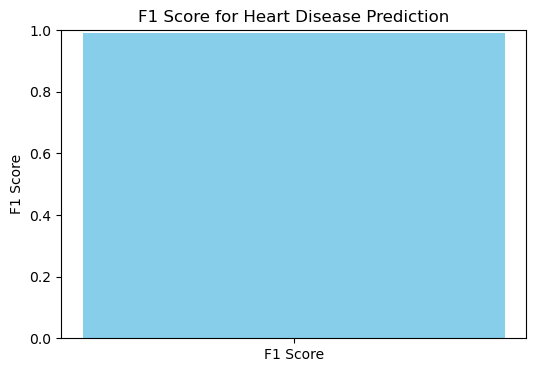

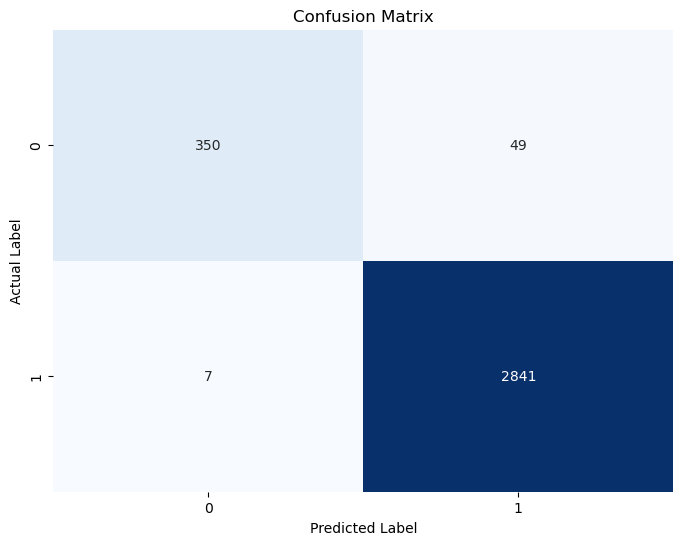

In [71]:
import pandas as pd
import numpy as np
import heartpy as hp
import pickle
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

def heart_predict(filepath, modelpath):
    # Load test data
    data_test = pd.read_csv(filepath)

    # Load the trained model and columns used during training
    with open(modelpath, 'rb') as file:
        rfc, columns_used_for_training = pickle.load(file)  # Unpack the tuple

    # Process the ECG data
    data_all_params = []
    for i in data_test.loc[:, 'ECG']:
        i = np.array([int(j) for j in i.split(',')])
        wp, measures = hp.process(i, sample_rate=300.0, clean_rr=True, clean_rr_method='z-score', bpmmax=2000, bpmmin=-1000)
        values = [i for i in list(measures.values())]
        data_all_params.append(values)

    data_all_params = np.array(data_all_params)
    data = pd.DataFrame(data_all_params)
    data['Classification'] = data_test['Classification']

    # One-hot encode the data and ensure feature alignment with training data
    data = pd.get_dummies(data, drop_first=True)

    # Ensure the test data has the same columns as the training data
    data = data.reindex(columns=columns_used_for_training, fill_value=0)

    # Handle NaN, infinity, or very large values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Replace inf values and drop NaNs
    data = data.astype(np.float32)  # Ensure the data is of float32 type

    # Split features and labels
    y_test = data['Classification_N']
    X_test = data.drop(['Classification_N'], axis=1)

    # Predict and calculate F1 score
    y_pred = rfc.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    return f1, cm, y_test, y_pred

# Call the function
f1_result, cm, y_test, y_pred = heart_predict('ECG_training.csv', 'ModelFile.pkl')

# Plotting F1 Score (simple bar plot)
def plot_f1_score(f1_score_value):
    plt.figure(figsize=(6, 4))
    plt.bar(['F1 Score'], [f1_score_value], color='skyblue')
    plt.title('F1 Score for Heart Disease Prediction')
    plt.ylabel('F1 Score')
    plt.ylim(0, 1)  # Assuming F1 score ranges from 0 to 1
    plt.show()

# Plotting Confusion Matrix
def plot_confusion_matrix(cm, y_test, y_pred):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot F1 Score
plot_f1_score(f1_result)

# Plot Confusion Matrix
plot_confusion_matrix(cm, y_test, y_pred)
